In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [ ]:
# Load the dataset
path = '/content/sample_data/riceClassification.csv'
data = pd.read_csv(path)




In [ ]:
# Inspect the dataset
print(data.head())

   id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB
None


In [ ]:
print(data.describe())

                 id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      5

In [ ]:
# Check for missing values
print(data.isnull().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


In [ ]:
# Encode the target variable (Class) if it is categorical
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [ ]:
# Separate features and target variable
X = data.drop(columns=['id', 'Class'])  # Drop 'id' and 'Class' for features
y = data['Class']


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Correlation Heatmap')

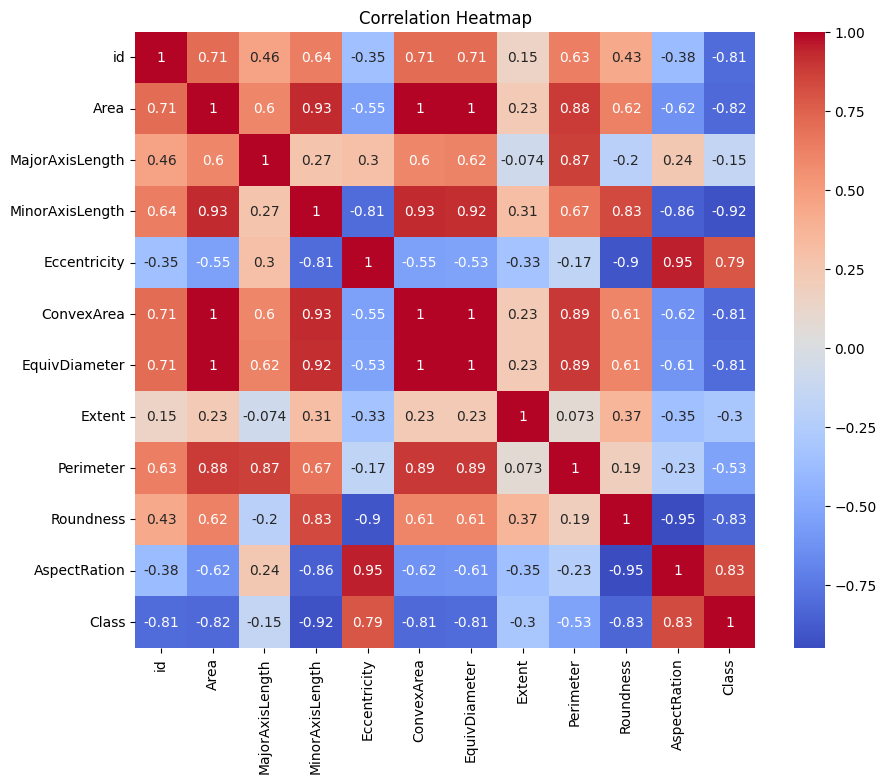

In [ ]:
# Exploratory Data Analysis (EDA)
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

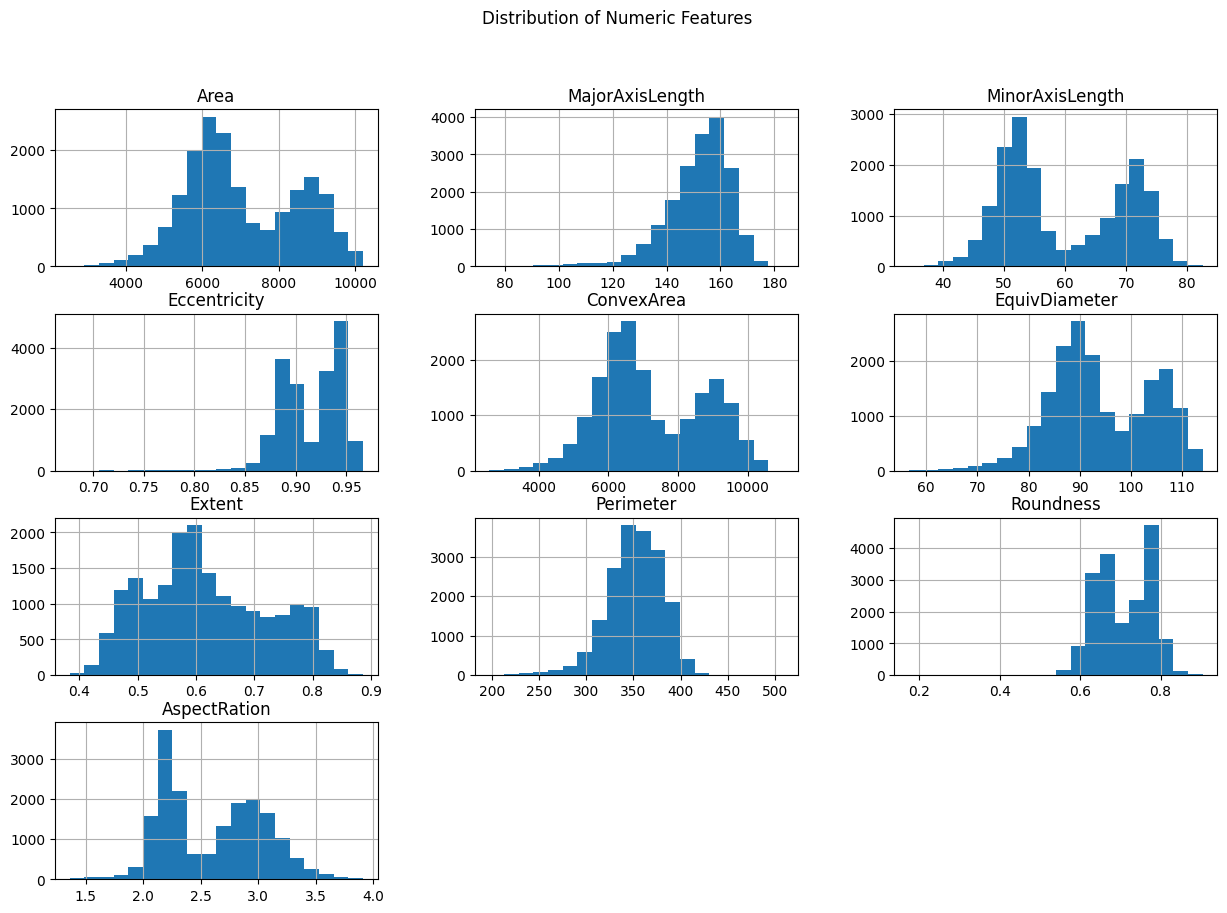

In [ ]:
# Plot histogram of each numeric feature
numeric_columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
                   'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter',
                   'Roundness', 'AspectRation']  # Replace with actual column names

data[numeric_columns].hist(bins=20, figsize=(15,10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

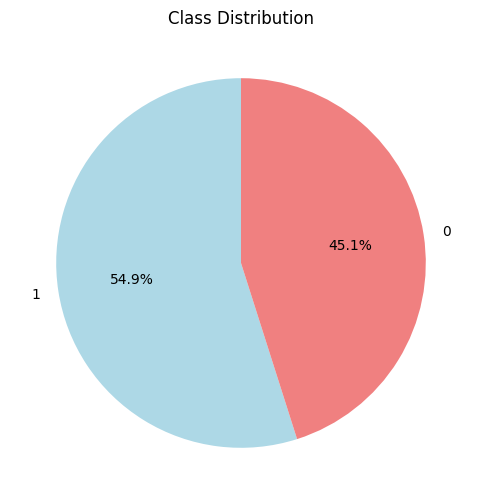

In [ ]:
# Assuming 'Class' is your target variable for classification
class_counts = data['Class'].value_counts()

# Pie chart of class distribution
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.show()

In [ ]:
# Implement Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression Predictions (rounded):", np.round(y_pred_linear[:5]))

Linear Regression Predictions (rounded): [0. 1. 0. 1. 1.]


In [ ]:
# Implement Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9906524926686217


In [ ]:
# Implement Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9851539589442815


In [ ]:
# Implement Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

Random Forest Accuracy: 0.9891862170087976


In [ ]:
# Implement SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9912023460410557


In [ ]:
# Implement k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))

k-NN Accuracy: 0.9891862170087976


In [ ]:
# Classification Report and Confusion Matrix for Logistic Regression (example)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2447
           1       0.99      0.99      0.99      3009

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

Confusion Matrix:
 [[2416   31]
 [  20 2989]]


In [ ]:
 # Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.2f}")

    # Print classification report
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

     # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred

In [ ]:

# Feature names used during training
feature_names = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
                 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter',
                 'Roundness', 'AspectRation']

# Create DataFrame from the input
new_sample_df = pd.DataFrame(new_sample, columns=feature_names)

# Scale and predict
new_sample_scaled = scaler.transform(new_sample_df)
prediction = logistic_model.predict(new_sample_scaled)


In [ ]:

# Create new sample data with feature names
new_samples = np.array([
    [1500, 100, 50, 0.85, 1450, 98, 0.75, 120, 0.88, 2.1],
    [1300, 90, 45, 0.80, 1280, 85, 0.70, 110, 0.85, 2.0]
])

# Convert to DataFrame
new_samples_df = pd.DataFrame(new_samples, columns=feature_names)

# Scale the data
new_samples_scaled = scaler.transform(new_samples_df)

# Predict using the model
predictions = logistic_model.predict(new_samples_scaled)

# Decode and print results
predicted_classes = label_encoder.inverse_transform(predictions)
print("Predicted Classes:", predicted_classes)


Predicted Classes: [1 1]
